In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=5, noise=15, bias=10, random_state=1)


In [3]:
class CustomLinearReg:
    
    def __init__(self, lr=.1, iters=10):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        ya = y.reshape(-1, 1)
        
        first = np.linalg.inv(np.dot(X.T, X))
        second = np.dot(X.T, ya)
        
        self.theta_ = np.dot(first, second)


    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypo(X).flatten()

In [4]:
# for i in range(5, 15):

#     model = CustomLinearReg(lr=.0001*i, iters=30)
#     errors = model.fit(X, y)
    
#     plt.figure()
#     plt.title(str(.0001*i))
#     plt.plot(errors)
#     plt.show()

In [7]:
model = CustomLinearReg(lr=.0008, iters=10000)
model.fit(X, y)


In [8]:
model.predict(X[:10])

array([  40.67700061,   94.13914173,  119.19311409,  -38.23332827,
       -263.6458621 ,   15.65907497,   63.61668356,   53.70384478,
        -16.57922216,   37.11081015])

In [9]:
y[:10]

array([  43.5171099 ,   57.65141943,  123.08271761,  -43.37373343,
       -247.57689921,    8.53711187,   41.42818339,   51.97005873,
        -20.65603669,   57.77285488])

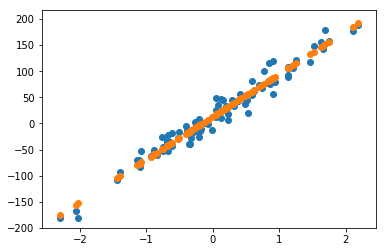

In [40]:
plt.scatter(X, y)
plt.scatter(X, model.predict(X))